### Using the Louvain Algorithm

We'll discuss the Louvain algorithm in class, but not in enough detail for you to implement it. Instead, the goal will be for you to be able to use the algorithm with a basic understanding of what it can and can't do.

Good resources for reading more about the Louvain algorithm are the seminal paper and the wikipedia page.
- Blondel, Vincent D., et al. "[Fast unfolding of communities in large networks](https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/pdf)", Journal of statistical mechanics: Theory and experiment 2008.10 (2008): P10008.
- The [wikipedia article[(https://en.wikipedia.org/wiki/Louvain_method)] on the Louvain method

---

**Visualization**: We'll use the same tool for visualizing partitions that we've been using in other tutorials.

In [22]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import networkx as nx
import numpy as np
import random
from typing import Hashable, Tuple, Set

def get_NCM_Figure3_14() -> Tuple[nx.Graph, dict[Hashable, Tuple[float, float]]]:
    """
        Figure 3.14 from the book Networks, Crowds, and Markets is a useful
        example graph. This function returns this figure as a networkx Graph
        and a position dictionary for the neato layout
    """
    G: nx.Graph = nx.Graph()
    G.add_nodes_from(range(0,14))
    G.add_edges_from([(0,1),(0,2),(1,2),(3,4),(3,5),(4,5),(8,9),(8,10),(9,10),(11,12),(11,13),(12,13),(2,6),(5,6),(7,8),(7,11),(6,7)])
    pos: dict[Hashable, Tuple[float, float]] = nx.nx_pydot.graphviz_layout(G,prog='neato')
    return G, pos

def draw_edge_by_type(G: nx.Graph, 
                      pos: dict[Hashable, Tuple[float, float]], 
                      edge: Tuple[Hashable, Hashable], 
                      partition: Tuple[Set, ...]
                      ) -> None:
    """
        Draw edges between nodes in different partitions using dashed lines.
        Draw edges between nodes within the same partition using solid lines.
    """
    edge_style = 'dashed'
    for part in partition:
        if edge[0] in part and edge[1] in part:
            edge_style = 'solid'
            break
    nx.draw_networkx_edges(G, pos, edgelist=[edge], style = edge_style)

def show_partitions(G: nx.Graph,
                    partition: Tuple[Set, ...], 
                    pos: dict[Hashable, Tuple[float, float]] | None = None,
                    title = ""
                    ) -> None:
    """ 
        Show the networkx graph with colors and edges indicating properties
        of the partition

        Edges:
        • Dashed lines indicate edges between nodes in different partitions
        • Solid lines indicate edges between nodes in the same partition

        Nodes:
        • All nodes in the same partition get mapped to the same color
        • When there are more partitions than ther are in the color pallette, repeat colors
    """
    #color_list = ['c','m','y','g','r']
    color_list: list[str] = ['y', 'lightblue', 'violet', 'salmon', 
                         'aquamarine', 'lightpink', 'lightgray', 'linen']
    plt.clf()
    ax: Axes = plt.gca()
    if pos is None: 
        pos = nx.spring_layout(G, seed = 0)
    for i in range(len(partition)):
        nx.draw_networkx_nodes(partition[i],pos,node_color=color_list[i%len(color_list)], alpha = 0.8)
    for edge in G.edges:
        draw_edge_by_type(G, pos, edge, partition)
    nx.draw_networkx_labels(G,pos)

    ax.set_title(title)
    ax.set_axis_off()

---

**Practice networks**: I want you to make predictions about how the Louvain algorithm from networkx will partition the following networks.
- Small path graph
- The graph from Figure 3.14 in Networks, Crowds, and Markets
- The karate club graph
- A network with strong community structure

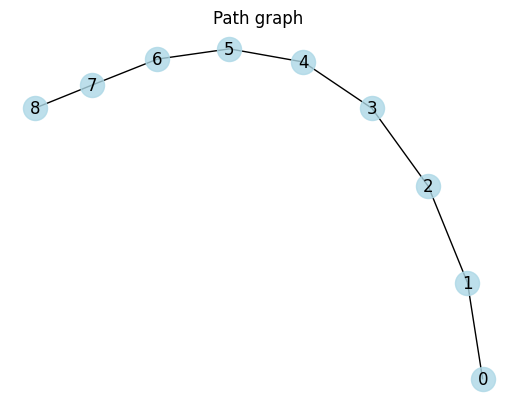

In [23]:
path_graph: nx.Graph = nx.path_graph(9)
show_partitions(path_graph, partition=[set(), 
                                       set(path_graph.nodes())],
                                       title = "Path graph")

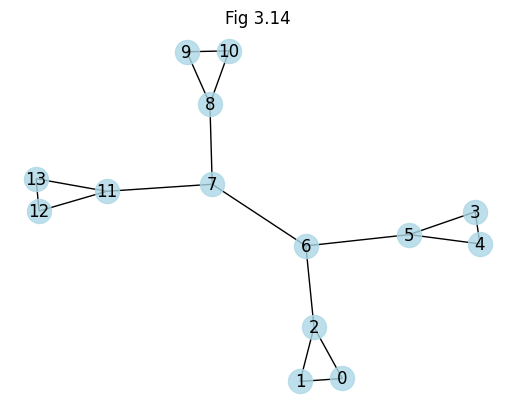

In [24]:
figure_314, _ = get_NCM_Figure3_14()
show_partitions(figure_314, partition=[set(), 
                                       set(figure_314.nodes())],
                                       title = "Fig 3.14")

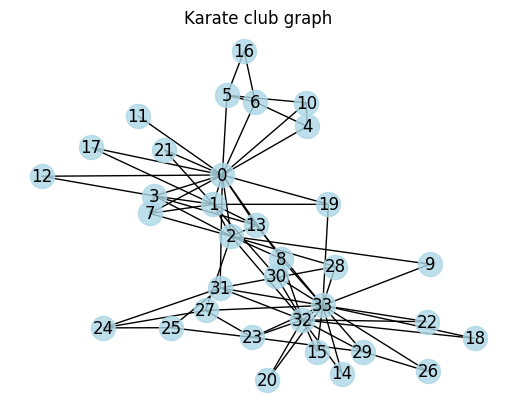

In [25]:
karate_club: nx.Graph = nx.karate_club_graph()
show_partitions(karate_club, partition=[set(), 
                                       set(karate_club.nodes())],
                                       title = "Karate club graph")

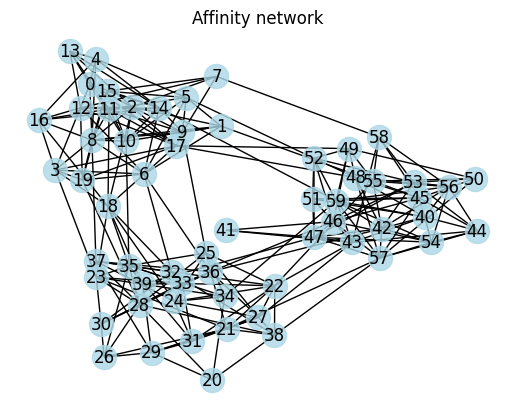

In [26]:
sizes = [20, 20, 20]
probs = [[0.35, 0.02, 0.02], [0.02, 0.35, 0.02], [0.02, 0.02, 0.40]]
affinity_graph: nx.Graph = nx.stochastic_block_model(sizes, probs, seed=42)
show_partitions(affinity_graph, partition=[set(), 
                                       set(affinity_graph.nodes())],
                                       title = "Affinity network")

---

**Louvain Communities for Path Graph**

Let's use the path graph to build understanding for what the [networkx implementation of the Louvain algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html) does. 

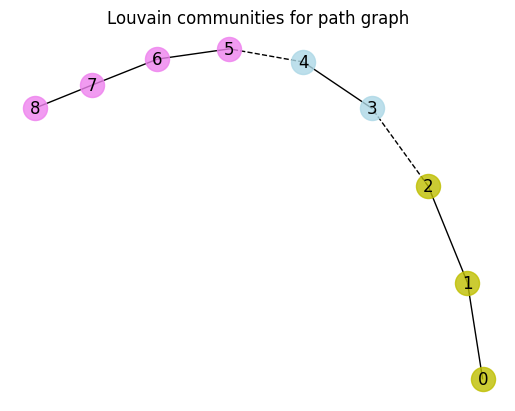

In [27]:
seed: int = 42
partition: list[set[Hashable]] = nx.community.louvain_communities(path_graph,
                                                                  seed=seed)
show_partitions(path_graph, 
                partition=partition,
                title="Louvain communities for path graph")

The Louvain algorithm has a subjective parameter that allows some control over how many communities will be formed. Larger communities are favored when the _resolution_ parameter is less than 1, and smaller communities are favored when the _resolution_ parameter is greater than 1.

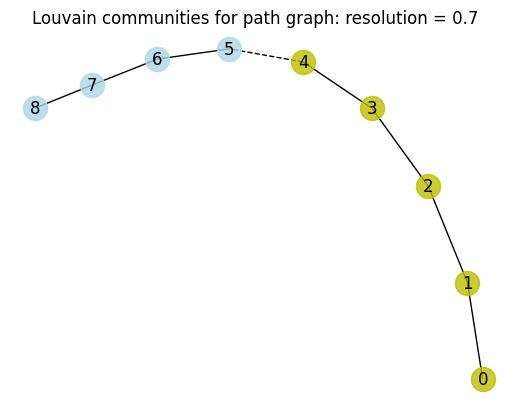

In [28]:
resolution: float = 0.7
partition: list[set[Hashable]] = nx.community.louvain_communities(path_graph,
                                                                  resolution=resolution,
                                                                  seed=seed)
show_partitions(path_graph, 
                partition=partition,
                title=f"Louvain communities for path graph: resolution = {resolution} ")

Example favoring more communities

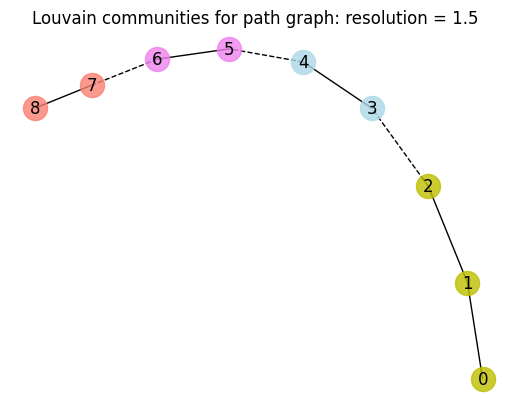

In [29]:
resolution: float = 1.5
partition: list[set[Hashable]] = nx.community.louvain_communities(path_graph,
                                                                  resolution=resolution,
                                                                  seed=seed)
show_partitions(path_graph, 
                partition=partition,
                title=f"Louvain communities for path graph: resolution = {resolution} ")

---

**Figure 3.14 network**: Make hypotheses about how the Louvain algorithm will partition the nodes for the network from figure 3.14. Specifically:
- how many groups are likely to ge in the partition using the default parameters?
- how much variation are you likely to see as you change the random seed?
- how many groups are likely to be in the partition when the resolution parameter is less than 1? greater than 1?

Test your hypotheses.

---

In [30]:
## Your code here ##

**Karate club network**: Make hypotheses about how the Louvain algorithm will partition the nodes for the karate club network. Specifically:
- how many groups are likely to ge in the partition using the default parameters?
- how much variation are you likely to see as you change the random seed?
- how many groups are likely to be in the partition when the resolution parameter is less than 1? greater than 1?

Test your hypotheses.

---

In [31]:
## Your code here ##

**Affinity network**: Make hypotheses about how the Louvain algorithm will partition the nodes for the affinity network. Specifically:
- how many groups are likely to ge in the partition using the default parameters?
- how much variation are you likely to see as you change the random seed?
- how many groups are likely to be in the partition when the resolution parameter is less than 1? greater than 1?

Test your hypotheses.

---

In [32]:
## Your code here ##

---

Explain to a classmate what you saw, where your hypotheses were correct, and what (if any) things surprised you?